# N2V Training
Here we will train a plain N2V network on single noisy images.

In [1]:
import matplotlib.pyplot as plt
from pn2v.unet import UNet

from pn2v import utils
from pn2v import training
from tifffile import imread

# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
path='data/Convallaria_diaphragm/'

# Load the training data
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')

### Create the Network and Train it
This can take a while.

In [3]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='conv_N2V', directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

/home/krull/projects/pn2vCheck/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/krull/projects/pn2vCheck/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 0.3765426553785801+-(2SEM)0.1279227916685506      
Epoch 1 finished      
avg. loss: 0.2777821462601423+-(2SEM)0.09849123862890843      
Epoch 2 finished      
avg. loss: 0.13786188121885062+-(2SEM)0.042484115623708164      
Epoch 3 finished      
avg. loss: 0.1334076628088951+-(2SEM)0.030446528995180064      
Epoch 4 finished      
avg. loss: 0.1570326631888747+-(2SEM)0.06266355305142955      
Epoch 5 finished      
avg. loss: 0.11786636784672737+-(2SEM)0.024805765654469018      
Epoch 6 finished      
avg. loss: 0.12015673499554395+-(2SEM)0.038688107814813404      
Epoch 7 finished      
avg. loss: 0.15155412238091232+-(2SEM)0.03580783946044995      
Epoch 8 finished      
avg. loss: 0.13173507079482077+-(2SEM)0.03550308823546951      
Epoch 9 finished      
avg. loss: 0.10643239542841912+-(2SEM)0.025437866535106372      
Epoch 10 finished      
avg. loss: 0.1390177359804511+-(2SEM)0.03262271473702893      
Epoch 11 finished      
avg. loss: 0.106886

Epoch 90 finished      
avg. loss: 0.12674069879576563+-(2SEM)0.026610592299468022      
Epoch 91 finished      
avg. loss: 0.11817380674183368+-(2SEM)0.042820805172960275      
Epoch 92 finished      
avg. loss: 0.14416311774402857+-(2SEM)0.038800917523801125      
Epoch 93 finished      
avg. loss: 0.09693180341273547+-(2SEM)0.024967627046776256      
Epoch 94 finished      
avg. loss: 0.08443844094872474+-(2SEM)0.017988774552256667      
Epoch 95 finished      
avg. loss: 0.11432975083589554+-(2SEM)0.024570183745368387      
Epoch 96 finished      
avg. loss: 0.09527028426527977+-(2SEM)0.01981979311988979      
Epoch 97 finished      
avg. loss: 0.1184925596229732+-(2SEM)0.03931482718061687      
Epoch 98 finished      
avg. loss: 0.1318995039910078+-(2SEM)0.030175598140719632      
Epoch 99 finished      
avg. loss: 0.13054412174969912+-(2SEM)0.03888581029423797      
Epoch 100 finished      
avg. loss: 0.1154963007196784+-(2SEM)0.025382615854024404      
Epoch   100: reducing lear

avg. loss: 0.10577574456110597+-(2SEM)0.030708221441462142      
Epoch   177: reducing learning rate of group 0 to 1.2207e-07.
Epoch 178 finished      
avg. loss: 0.09064709218218922+-(2SEM)0.0238484442746126      
Epoch 179 finished      
avg. loss: 0.11593986582010984+-(2SEM)0.028848489746458355      
Epoch 180 finished      
avg. loss: 0.11242860294878483+-(2SEM)0.033348526154819605      
Epoch 181 finished      
avg. loss: 0.12201768085360527+-(2SEM)0.022947279218883468      
Epoch 182 finished      
avg. loss: 0.10489928144961595+-(2SEM)0.019302167214129973      
Epoch 183 finished      
avg. loss: 0.12149366810917854+-(2SEM)0.03247195558397946      
Epoch 184 finished      
avg. loss: 0.12925710380077363+-(2SEM)0.028510144869626143      
Epoch 185 finished      
avg. loss: 0.11504415702074766+-(2SEM)0.038025488848093106      
Epoch 186 finished      
avg. loss: 0.13560356330126525+-(2SEM)0.03045251189282033      
Epoch 187 finished      
avg. loss: 0.10921160373836755+-(2SEM)0.02

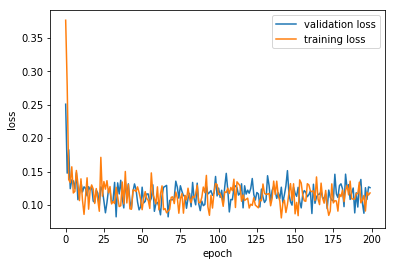

In [4]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()